In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df.shape

(303, 14)

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are not missing values
### Corelation of Target with Features 

In [22]:
df.corr()["target"].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

#### FBS is the min correlated feature with the target

In [23]:
y = df.target

In [24]:
# Vizualization of Target Values
# sns.countplot(df["target"])

In [25]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [26]:
target_temp = df.target.value_counts()

print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2))+ "%")
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2))+ "%")

Percentage of patience without heart problems: 45.54%
Percentage of patience with heart problems: 54.46%


In [27]:
df.sex.unique()

array([1, 0], dtype=int64)

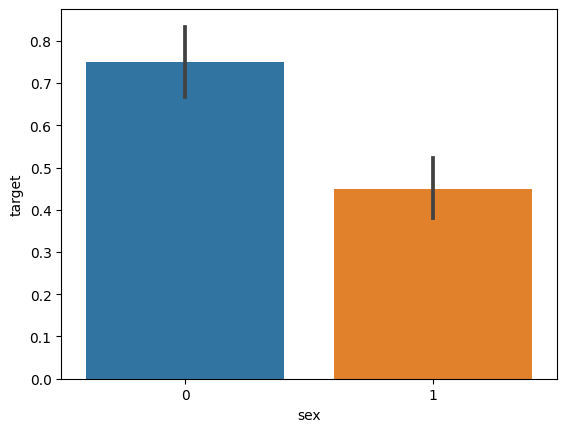

In [30]:
sns.barplot(x = "sex", y = "target", data=df)  # Specify x and y variables explicitly
plt.show()

In [36]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [37]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [38]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [39]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


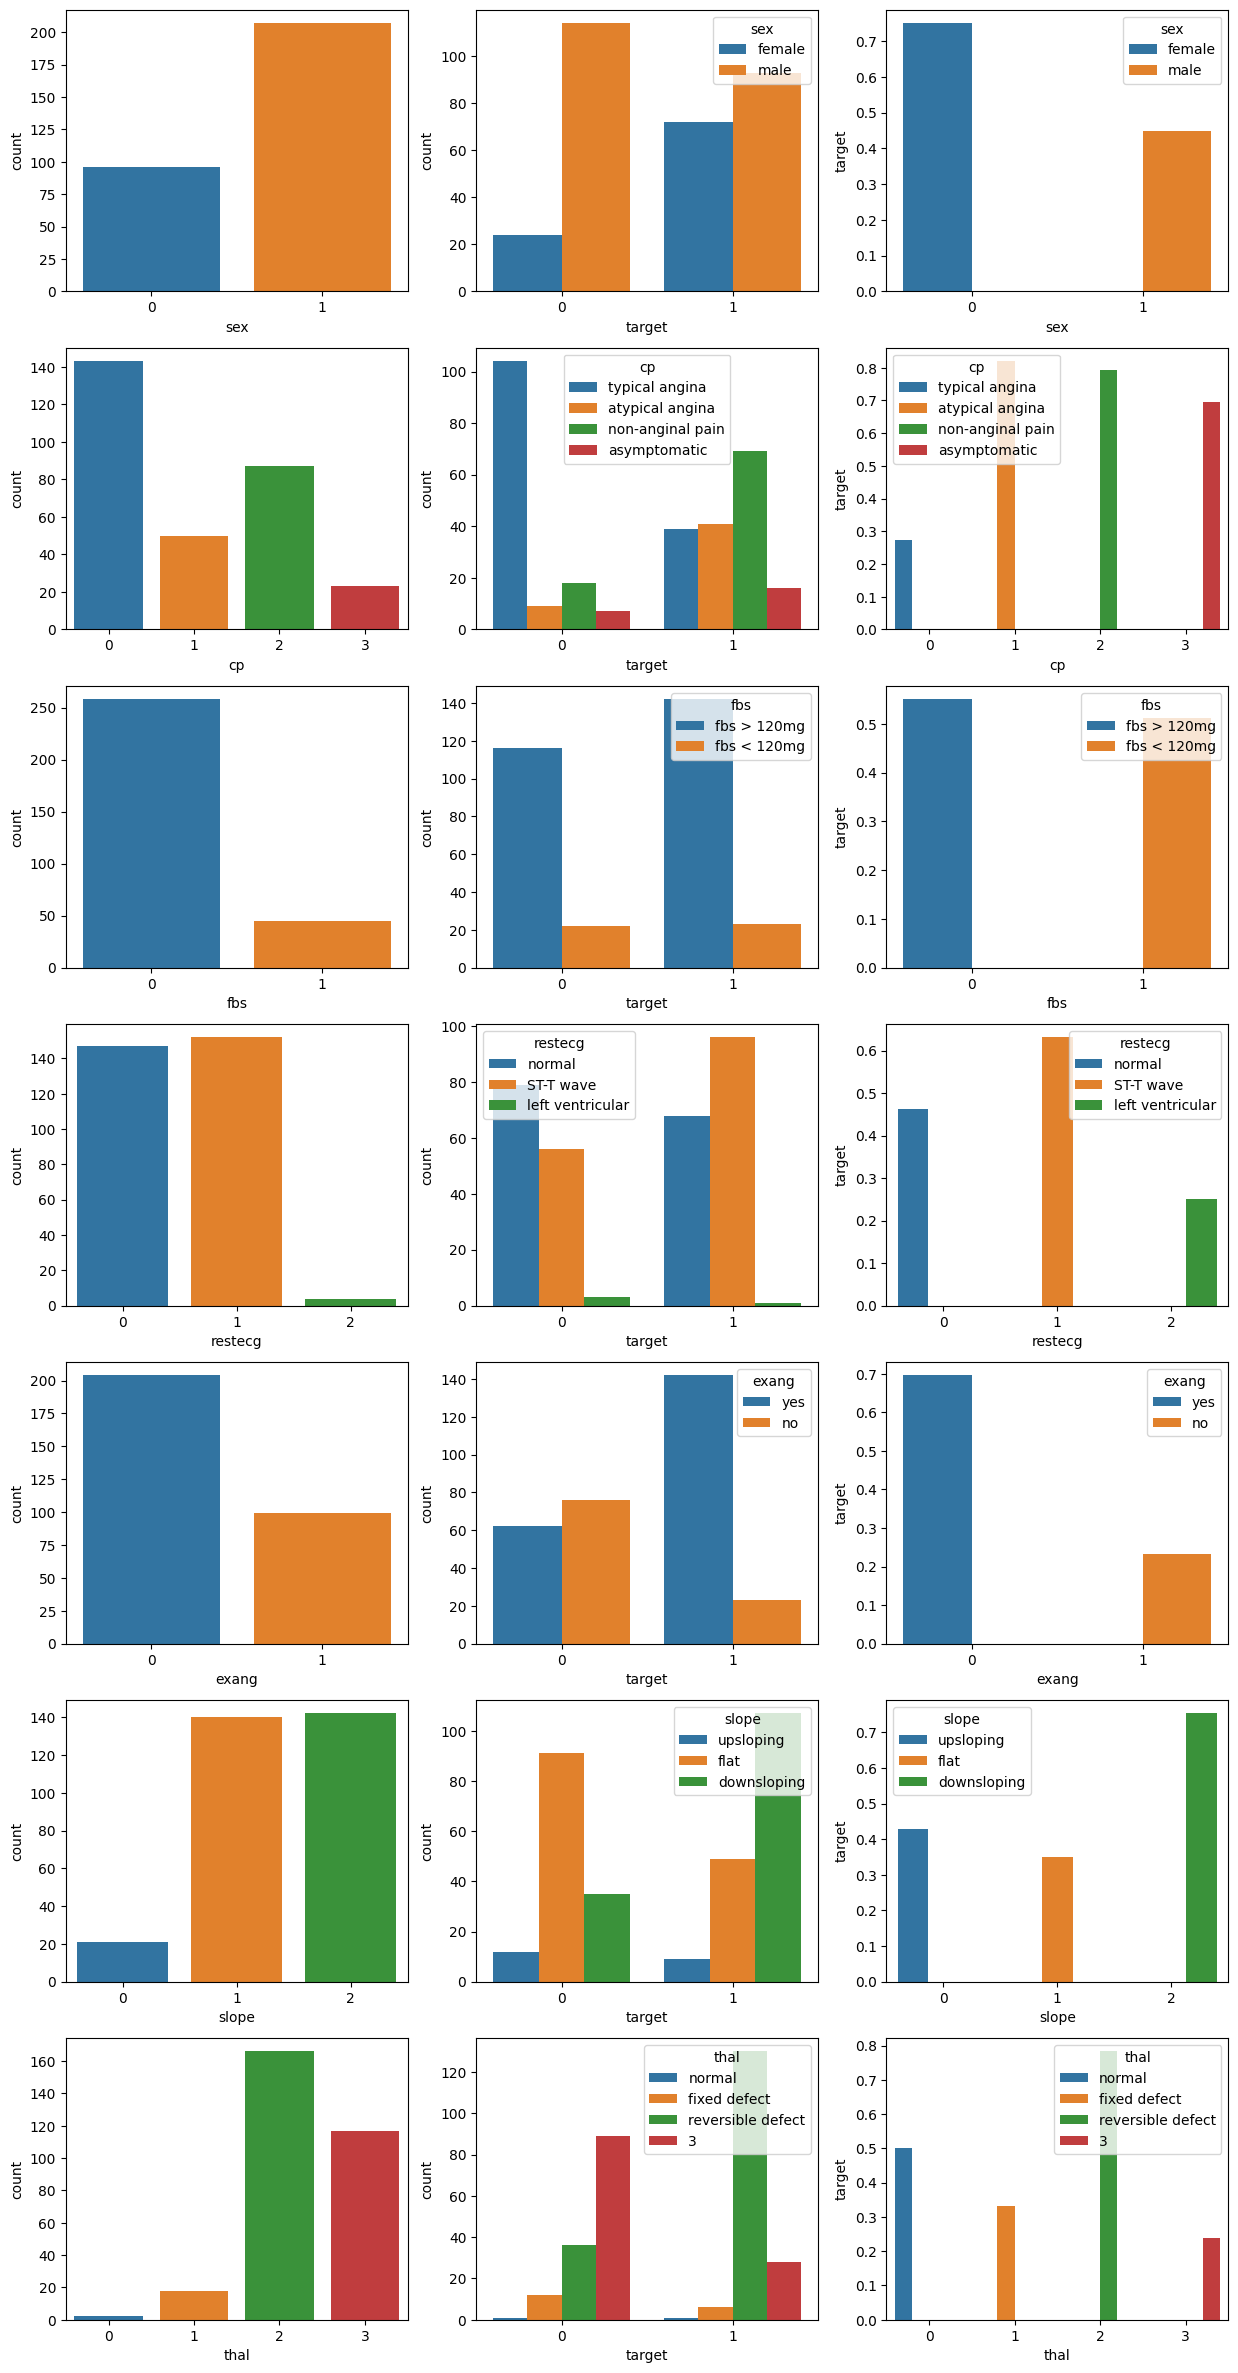

In [40]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

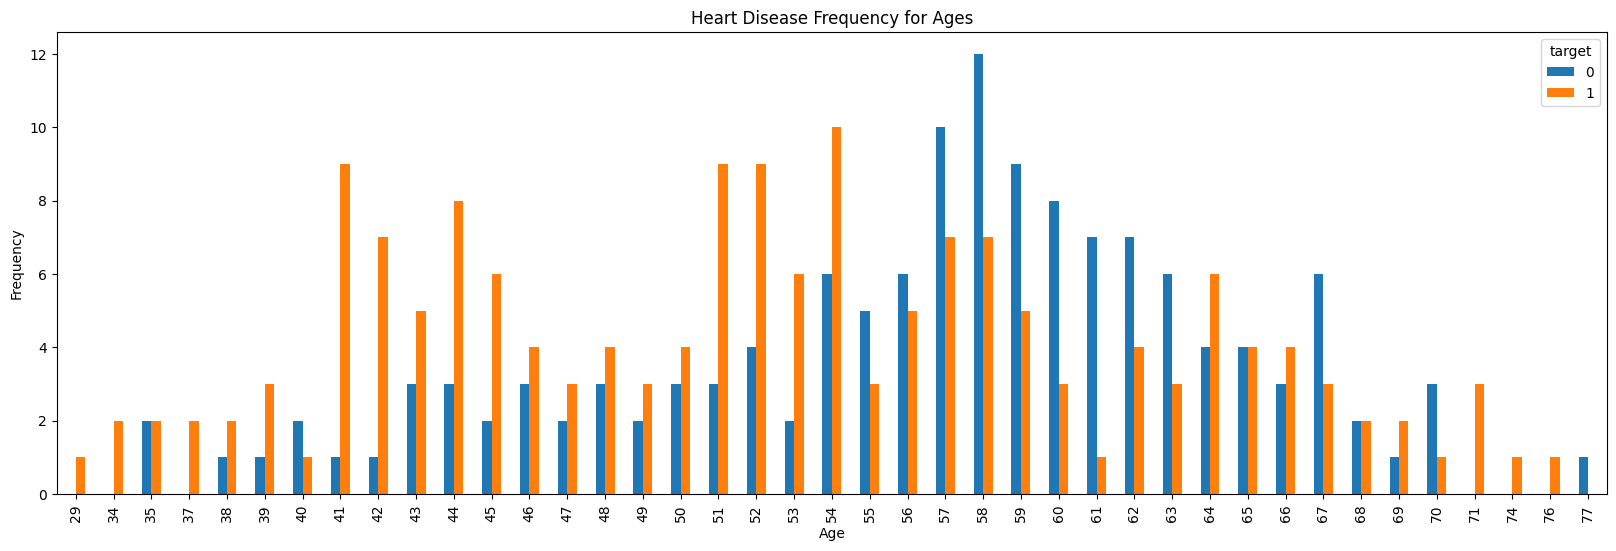

In [41]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

##### Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

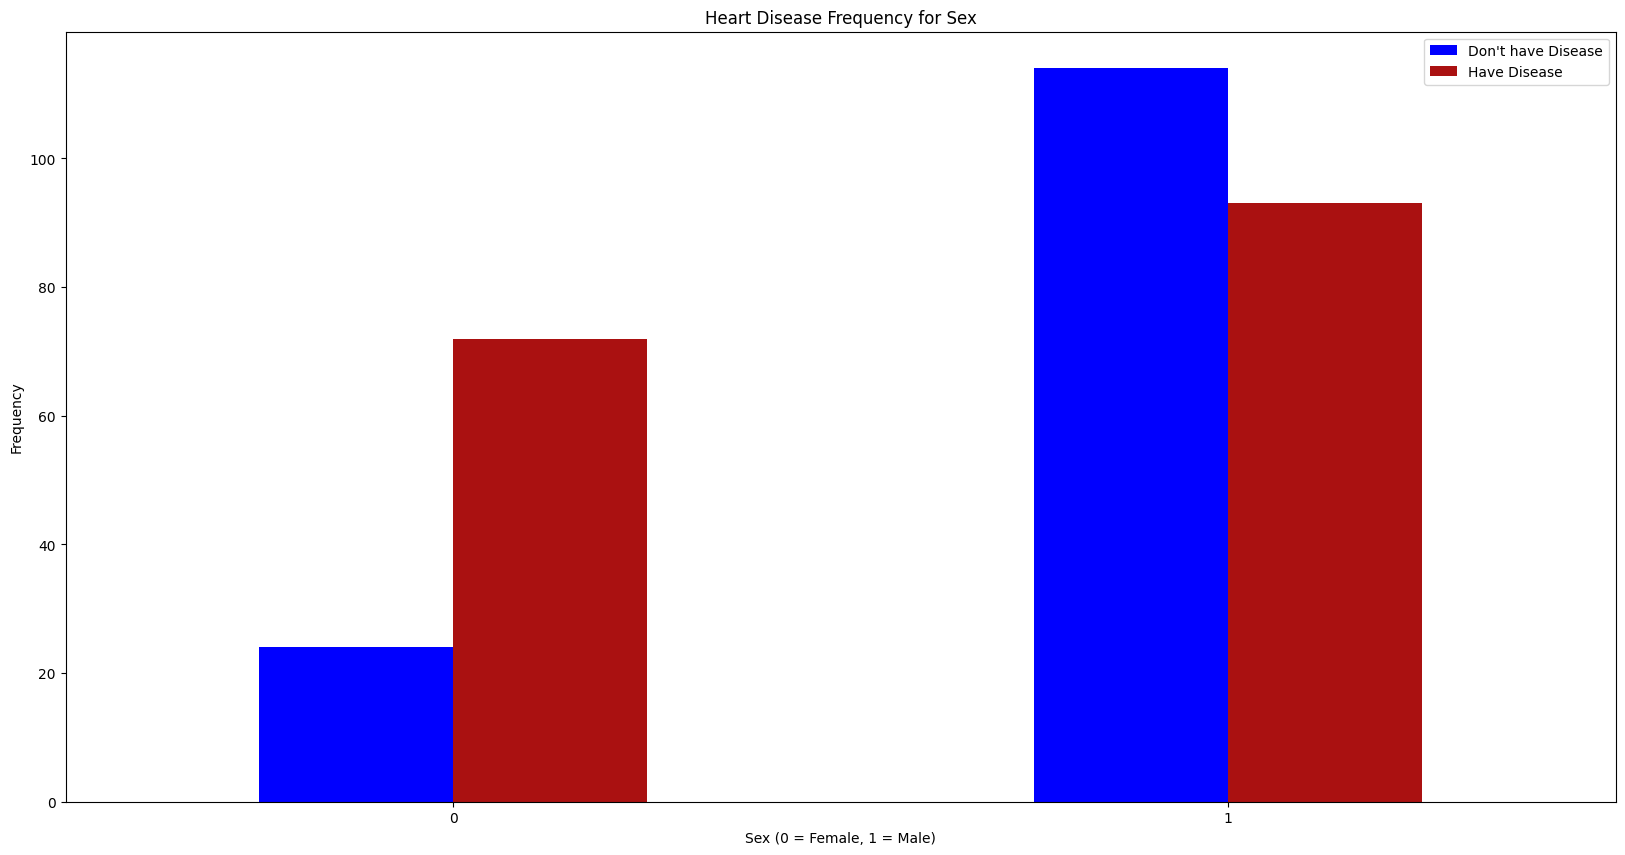

In [42]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [43]:
## Rename Columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

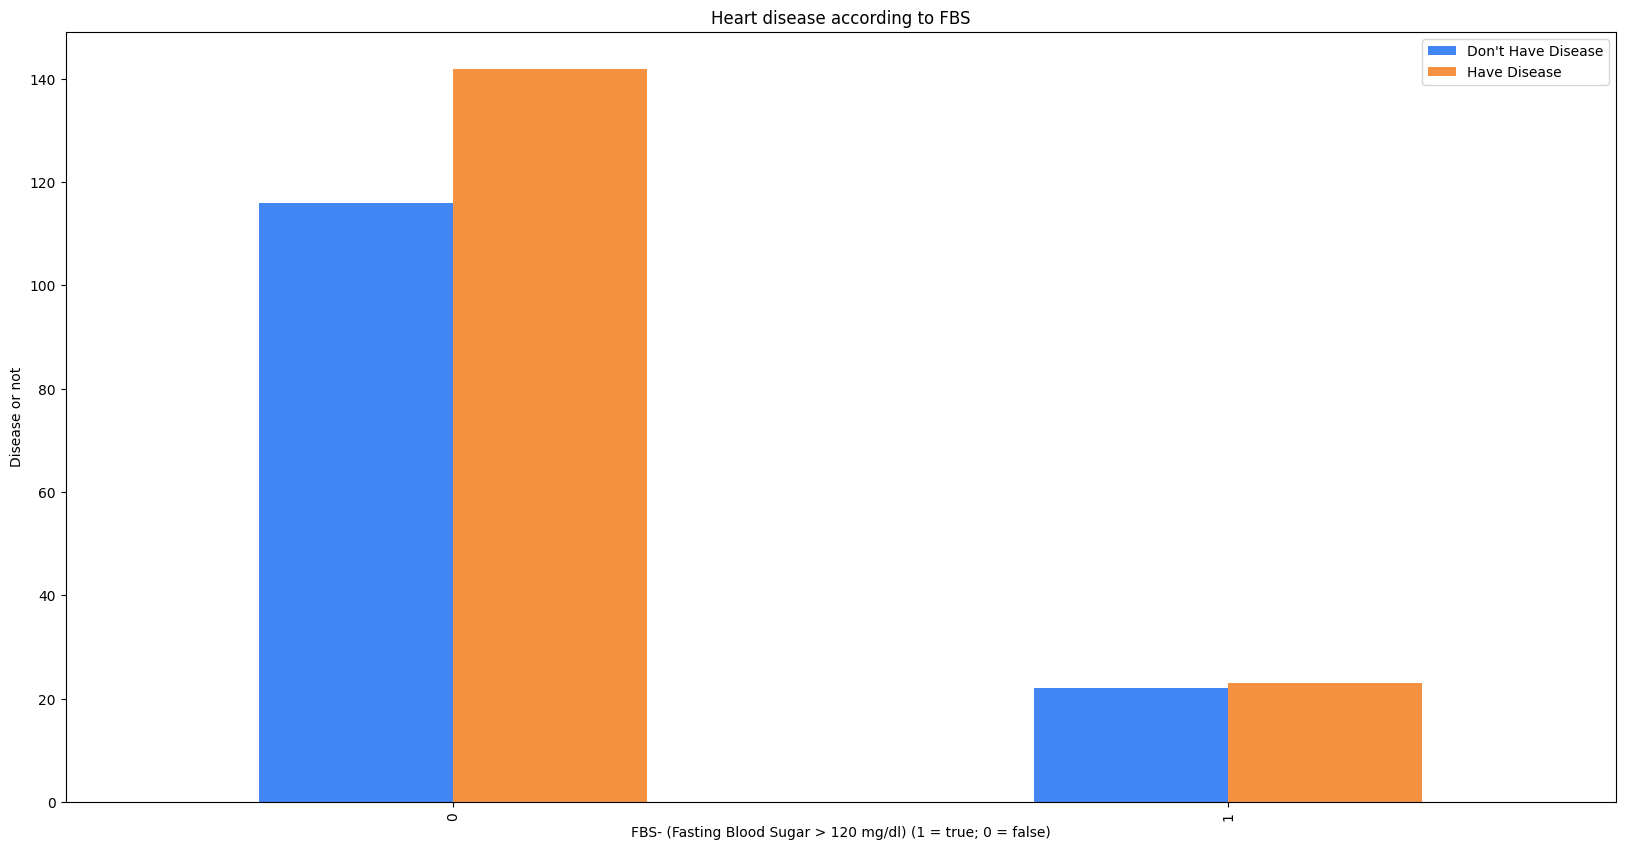

In [44]:
# Heart disease according to Fasting Blood sugar 
pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [45]:
# Pain Chest
df["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

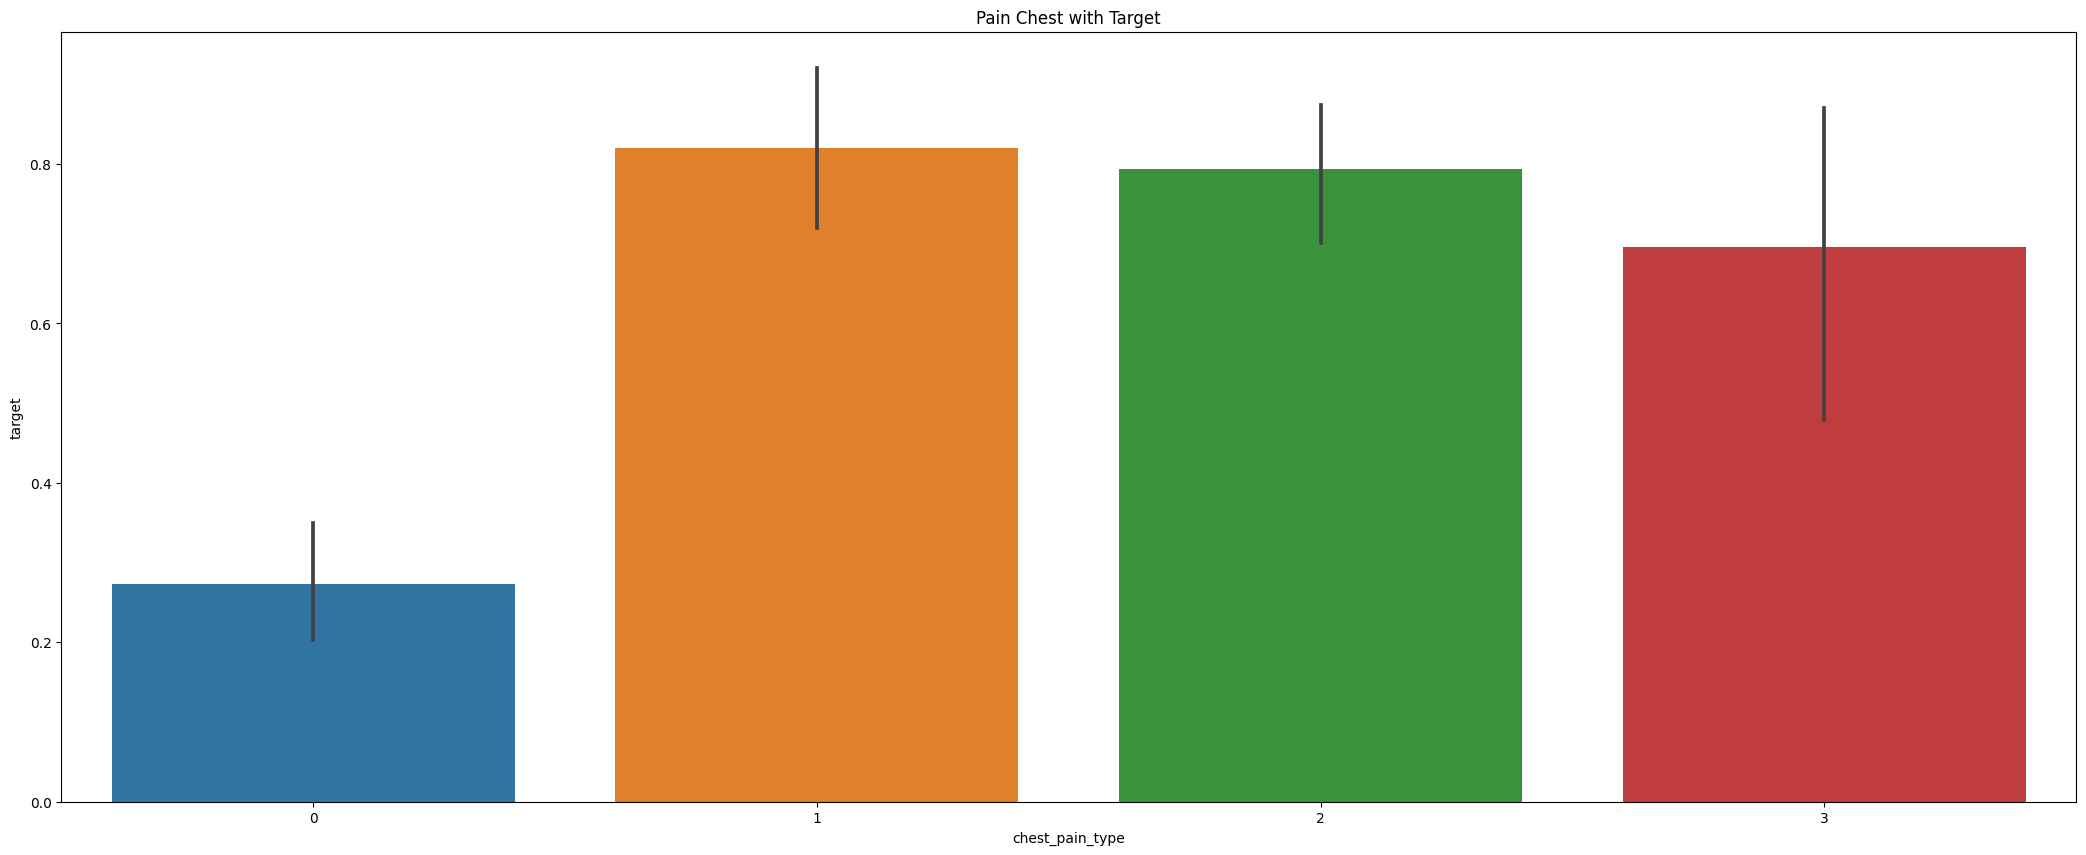

In [46]:
plt.figure(figsize=(26, 10))  
sns.barplot(x="chest_pain_type", y=y, data=df) 
plt.title("Pain Chest with Target")
plt.show()  

### Major Vessels

In [48]:
df["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

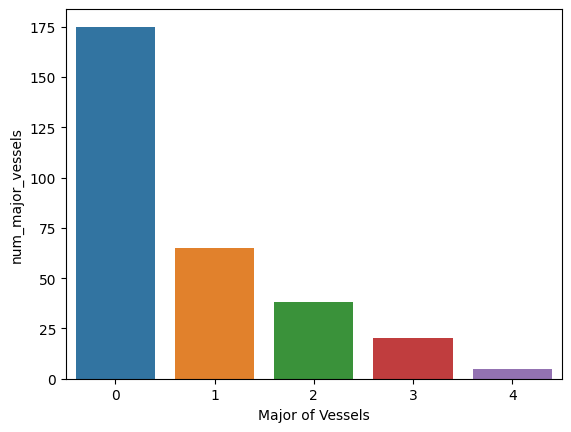

In [53]:
sns.barplot(x=df["num_major_vessels"].value_counts().index, y=df["num_major_vessels"].value_counts())
plt.xlabel("Major of Vessels")
plt.show()

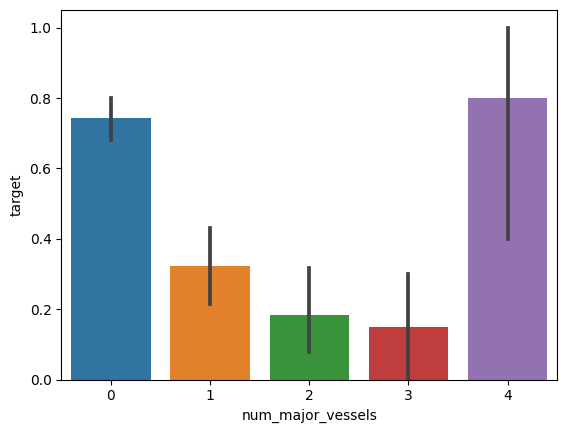

In [58]:
sns.barplot(x=df["num_major_vessels"], y=y)
plt.show()

#### A blood disorder called thalassemia

In [59]:
df["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

C:\Users\sohil\AppData\Local\Temp\ipykernel_18948\4189989142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["thalassemia"])


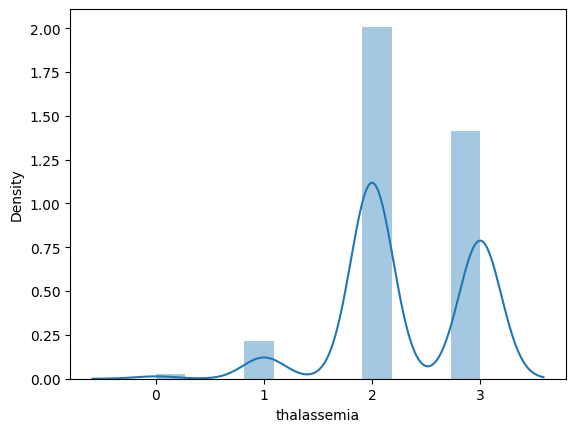

In [62]:
sns.distplot(df["thalassemia"])
plt.show()

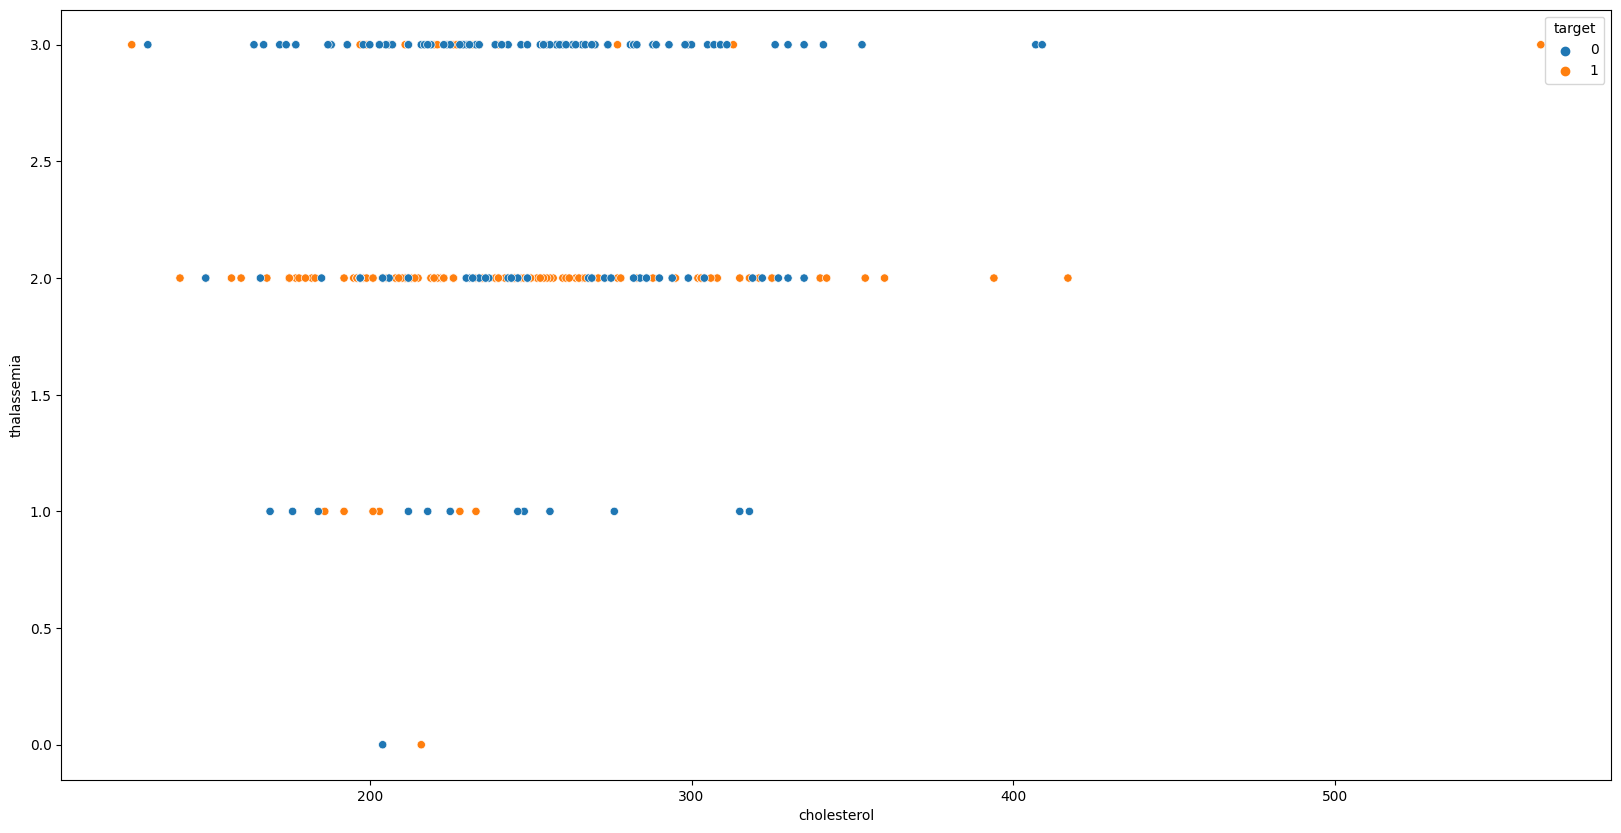

In [64]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=df,hue='target')
plt.show()

## Correlation Plots

In [66]:
#Numerical columns
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

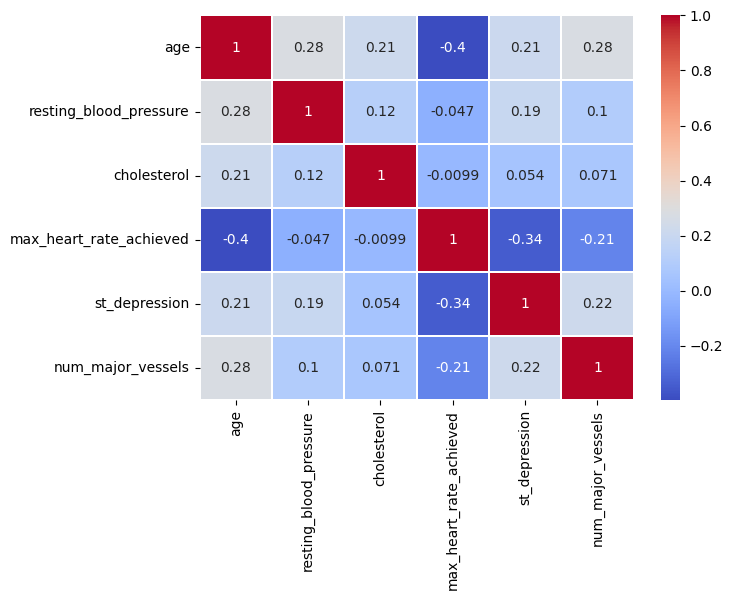

In [67]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = df.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [68]:
df_corr = df.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


## Split Model 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
# Features
predictors = df.drop("target",axis=1)
# Target 
target = df["target"]

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records \nTesting features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records 
Testing features have 61 records.


In [75]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape )

(242, 13) (61, 13) (242,) (61,)


## Logistic Regression 

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
from sklearn.linear_model import LogisticRegression
# Model
LogReg = LogisticRegression(max_iter=1000)
# Fit model
LogReg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [81]:
LogReg_Y_Predict = LogReg.predict(X_test)
LogRegAccuracy = round(accuracy_score(LogReg_Y_Predict, Y_test), 2)* 100
print("Logistic Regression Accuracy is {0}%".format(LogRegAccuracy))

Logistic Regression Accuracy is 85.0%


In [83]:
confusion_matrix(Y_test, LogReg_Y_Predict)

array([[21,  6],
       [ 3, 31]], dtype=int64)

In [85]:
print(classification_report(Y_test, LogReg_Y_Predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



<AxesSubplot: >

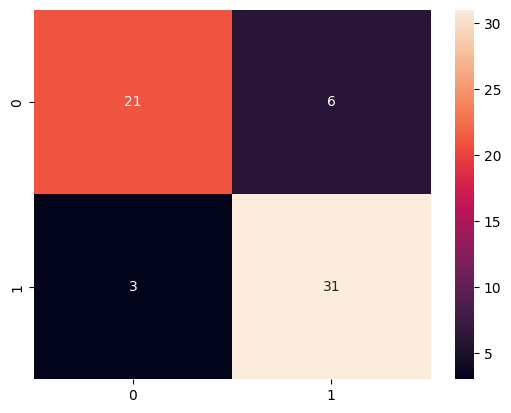

In [86]:
matrix = confusion_matrix(Y_test, LogReg_Y_Predict) 
sns.heatmap(matrix,annot = True, fmt = "d")

## Random Forest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
RandomForest = RandomForestClassifier(n_estimators=100, random_state=0)

RandomForest.fit(X_train, Y_train)

RandomForest_Y_Predict = RandomForest.predict(X_test)

In [91]:
score_rf = round(accuracy_score(RandomForest_Y_Predict,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+"%")

The accuracy score achieved using Random Forest is: 88.52%


In [94]:
RandomForestMatrix= confusion_matrix(Y_test, RandomForest_Y_Predict)
RandomForestMatrix

array([[24,  3],
       [ 4, 30]], dtype=int64)

<AxesSubplot: >

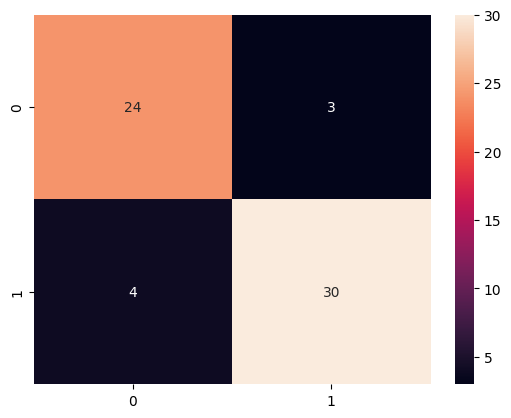

In [99]:
sns.heatmap(RandomForestMatrix,annot = True, fmt = "d")

In [108]:
print(classification_report(Y_test, RandomForest_Y_Predict ))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



## Gaussian Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
Gaussian_NB = GaussianNB()
Gaussian_NB.fit(X_train, Y_train)

Gaussian_NB_Y_Predict = Gaussian_NB.predict(X_test)


In [104]:
Gaussian_NB_Accuracy = round(accuracy_score(Gaussian_NB_Y_Predict,Y_test)*100,2)
Gaussian_NB_Accuracy

85.25

In [106]:
Gaussian_NB_Matrix= confusion_matrix(Y_test, Gaussian_NB_Y_Predict)
Gaussian_NB_Matrix

array([[21,  6],
       [ 3, 31]], dtype=int64)

<AxesSubplot: >

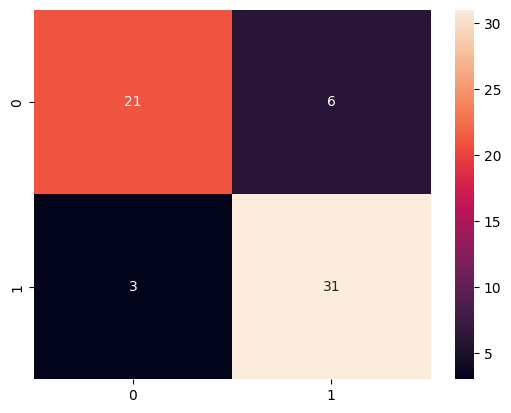

In [107]:
sns.heatmap(Gaussian_NB_Matrix,annot = True, fmt = "d")

In [109]:
print(classification_report(Y_test, Gaussian_NB_Y_Predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

